# Unsupervised Learning - Country Data
The following code is used to perform unsupervised learning on the country data. The data is first cleaned and then the unsupervised learning is performed. The results are then plotted and the clusters are analyzed.

The information about the data can be found in the README.md file in the data folder. It is related to the Unsupervised Learning Country Data available at Kaggle.com.

In [47]:
# Importing the libraries
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.express as px

In [2]:
# Import data
data = pd.read_csv('data/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## EDA and Data Cleaning
We will look at the current distribution of the data and then clean the data to make it more suitable for unsupervised learning. This means removing any columns that are not useful for the analysis, as well as treating any missing values and outliers accordingly.

In [3]:
# Check for missing values
data.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


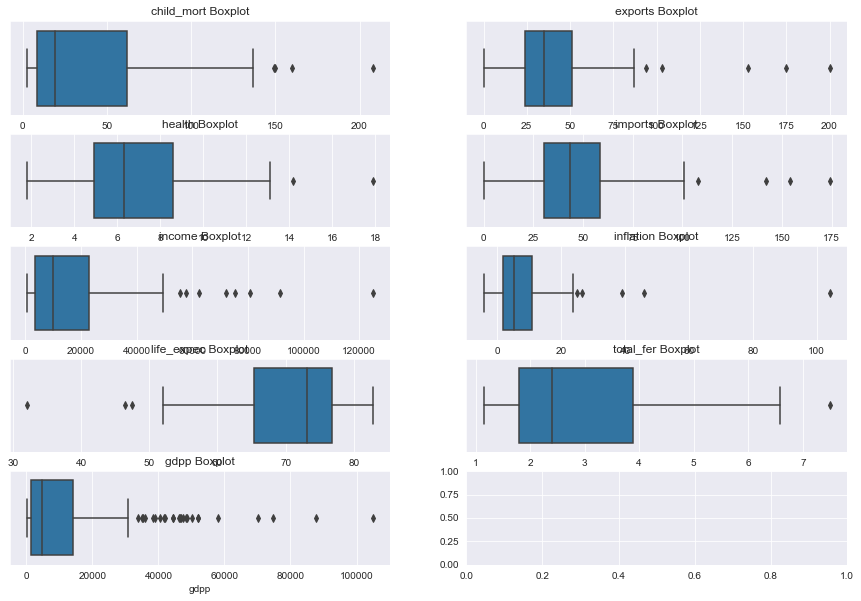

In [4]:
# Check for outliers:
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(5, 2, figsize=(15, 10))
for i, col in enumerate(data.columns[1:]):
    sns.boxplot(data[col], ax=ax[i//2, i%2]).set_title(col + ' Boxplot')

We can see that there are some outliers in the data. However, we will not remove them since they might help with the clustering. However, we will scale the data to make sure that the outliers do not have a large impact on the clustering.

## Scaling the data
Since there are outliers we will use the StandardScaler to scale the data. This will make sure that the outliers do not have a large impact on the clustering.

In [5]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[1:])
data_scaled['country'] = data['country']
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda


## Correlation Matrix
We will now look at the correlation matrix to see if there are any correlations between the variables. This will help us decide which variables to use for the clustering.

<AxesSubplot:>

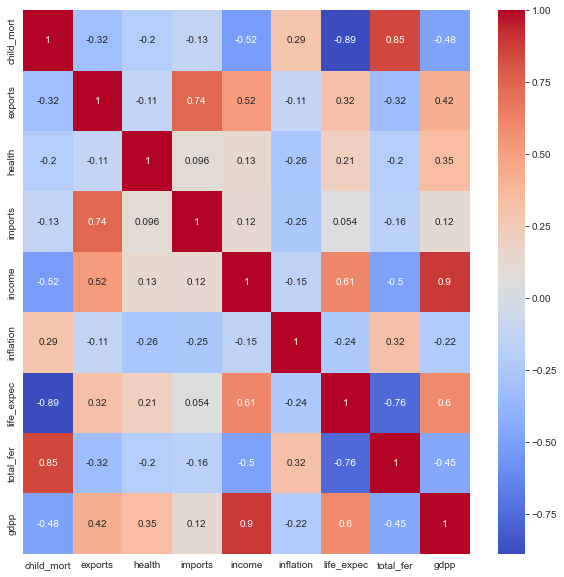

In [6]:
# Correlation matrix
corr = data_scaled.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, annot=True, cmap='coolwarm')

We can see that there are some correlations between the variables. However, we will not remove any of the variables since we want to see if the clustering can find any interesting patterns.

The variables that are highly correlated are:
- Income and gdpp
- life_expec and child_mort
- total_fer and child_mort

## Clustering
We will now perform the clustering. We will use the elbow method to find the optimal number of clusters. We will then use the silhouette score to see how well the clusters are separated. We will then plot the clusters and analyze them.

We will use the following clustering methods:
- K-Means
- Hierarchical Clustering
- DBSCAN

### Number of clusters:
We will first determine the optimal number of clusters using the elbow method. We will also use the silhouette score to see how well the clusters are separated.

#### Elbow Method

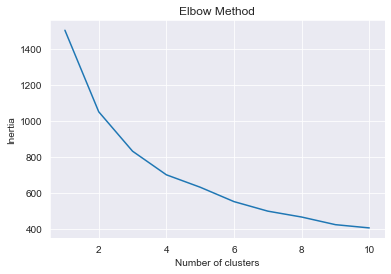

In [7]:
# Elbow method to find optimal number of clusters
warnings.filterwarnings('ignore')
inertia = []
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_scaled.iloc[:, :-1])
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


We can see that the optimal number of clusters is 3. We will now use the silhouette score to see how well the clusters are separated.

We determined that the optimal number of clusters is 3 given that the elbow method shows that the inertia decreases at a slower rate after 3 clusters. We will now use the silhouette score to see how well the clusters are separated.

### Clustering methods
Now we will use the optimal number of clusters to perform the clustering using the methods mentioned above.

#### K-Means

In [8]:
# K-Means
kmeans = cluster.KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled.iloc[:, :-1])
data_kmeans = data_scaled.copy()
data_kmeans['kmeans'] = kmeans.labels_

<AxesSubplot:xlabel='life_expec', ylabel='total_fer'>

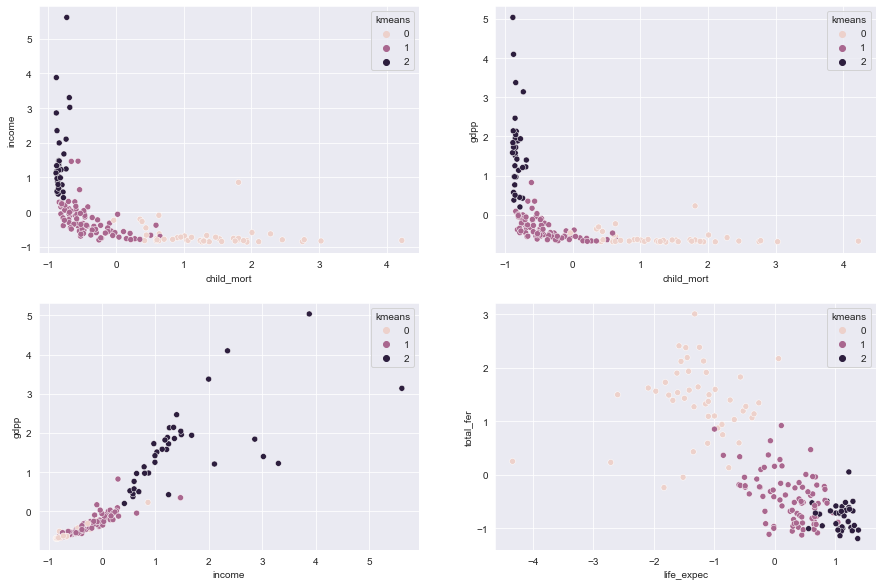

In [9]:
# Plotting the clusters
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data_kmeans['child_mort'], data_kmeans['income'], hue=data_kmeans['kmeans'], ax=ax[0, 0])
sns.scatterplot(data_kmeans['child_mort'], data_kmeans['gdpp'], hue=data_kmeans['kmeans'], ax=ax[0, 1])
sns.scatterplot(data_kmeans['income'], data_kmeans['gdpp'], hue=data_kmeans['kmeans'], ax=ax[1, 0])
sns.scatterplot(data_kmeans['life_expec'], data_kmeans['total_fer'], hue=data_kmeans['kmeans'], ax=ax[1, 1])

We can see that the clusters can be separated quite well. However, we will use the silhouette score to see how well the clusters are separated.

In [10]:
# Silhouette score
silhouette_score(data_scaled.iloc[:, :-2], kmeans.labels_)

0.24872744819168854

#### Hierarchical Clustering

In [11]:
# Hierarchical Clustering
hierarchical = cluster.AgglomerativeClustering(n_clusters=3)
hierarchical.fit(data_scaled.iloc[:, :-1])
data_hierarchy = data_scaled.copy()
data_hierarchy['hierarchical'] = hierarchical.labels_


In [12]:
data_hierarchy

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,hierarchical
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan,2
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda,1
...,...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,Vanuatu,1
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,Venezuela,1
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,Vietnam,1
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,Yemen,1


<AxesSubplot:xlabel='life_expec', ylabel='total_fer'>

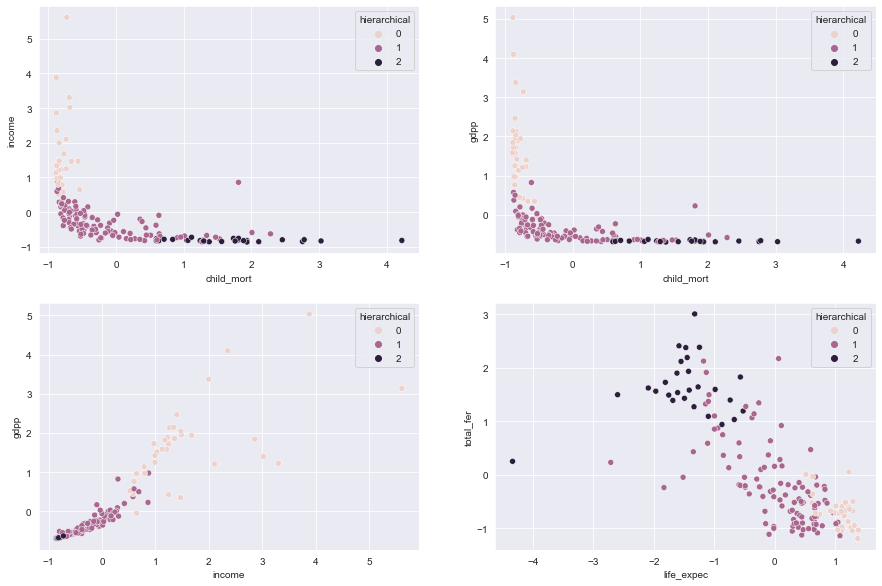

In [13]:
# Plotting the clusters
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data_hierarchy['child_mort'], data_hierarchy['income'], hue=data_hierarchy['hierarchical'], ax=ax[0, 0])
sns.scatterplot(data_hierarchy['child_mort'], data_hierarchy['gdpp'], hue=data_hierarchy['hierarchical'], ax=ax[0, 1])
sns.scatterplot(data_hierarchy['income'], data_hierarchy['gdpp'], hue=data_hierarchy['hierarchical'], ax=ax[1, 0])
sns.scatterplot(data_hierarchy['life_expec'], data_hierarchy['total_fer'], hue=data_hierarchy['hierarchical'], ax=ax[1, 1])


We can see that the clusters can be separated quite well. However, we will use the silhouette score to see how well the clusters are separated. We can also see that the clusters are very similar to the K-Means clusters.

In [14]:
# Silhouette score
silhouette_score(data_scaled.iloc[:, :-2], hierarchical.labels_)

0.20972553608701894

By comparing the silhouette scores we can see that the K-Means clustering method performs better than the Hierarchical Clustering method. We will use the K-Means clustering as a benchmark for the DBSCAN method.

#### DBSCAN

In [19]:
# DBSCAN
dbscan = cluster.DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan.fit(data_scaled.iloc[:, :-1])
data_dbscan = data_scaled.copy()
data_dbscan['dbscan'] = dbscan.labels_

<AxesSubplot:xlabel='life_expec', ylabel='total_fer'>

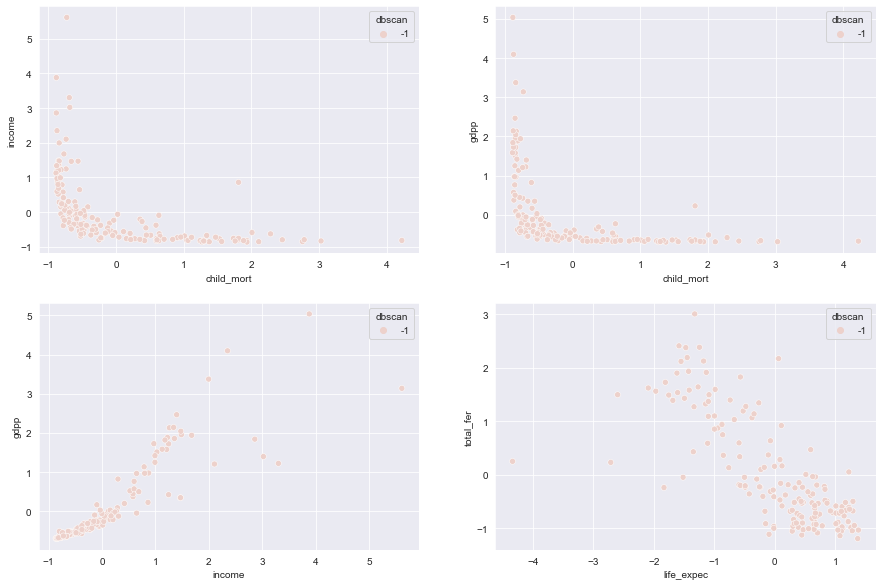

In [20]:
# Plotting the clusters
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data_dbscan['child_mort'], data_dbscan['income'], hue=data_dbscan['dbscan'], ax=ax[0, 0])
sns.scatterplot(data_dbscan['child_mort'], data_dbscan['gdpp'], hue=data_dbscan['dbscan'], ax=ax[0, 1])
sns.scatterplot(data_dbscan['income'], data_dbscan['gdpp'], hue=data_dbscan['dbscan'], ax=ax[1, 0])
sns.scatterplot(data_dbscan['life_expec'], data_dbscan['total_fer'], hue=data_dbscan['dbscan'], ax=ax[1, 1])


We can see that the DBSCAN method does not perform as well as the K-Means method. We will now compare the clusters to the original clusters.

## Analysis of Clusters:
We will now evaluate the clusters obtained from the K-Means method. We will see the countries in each cluster and analyze them.

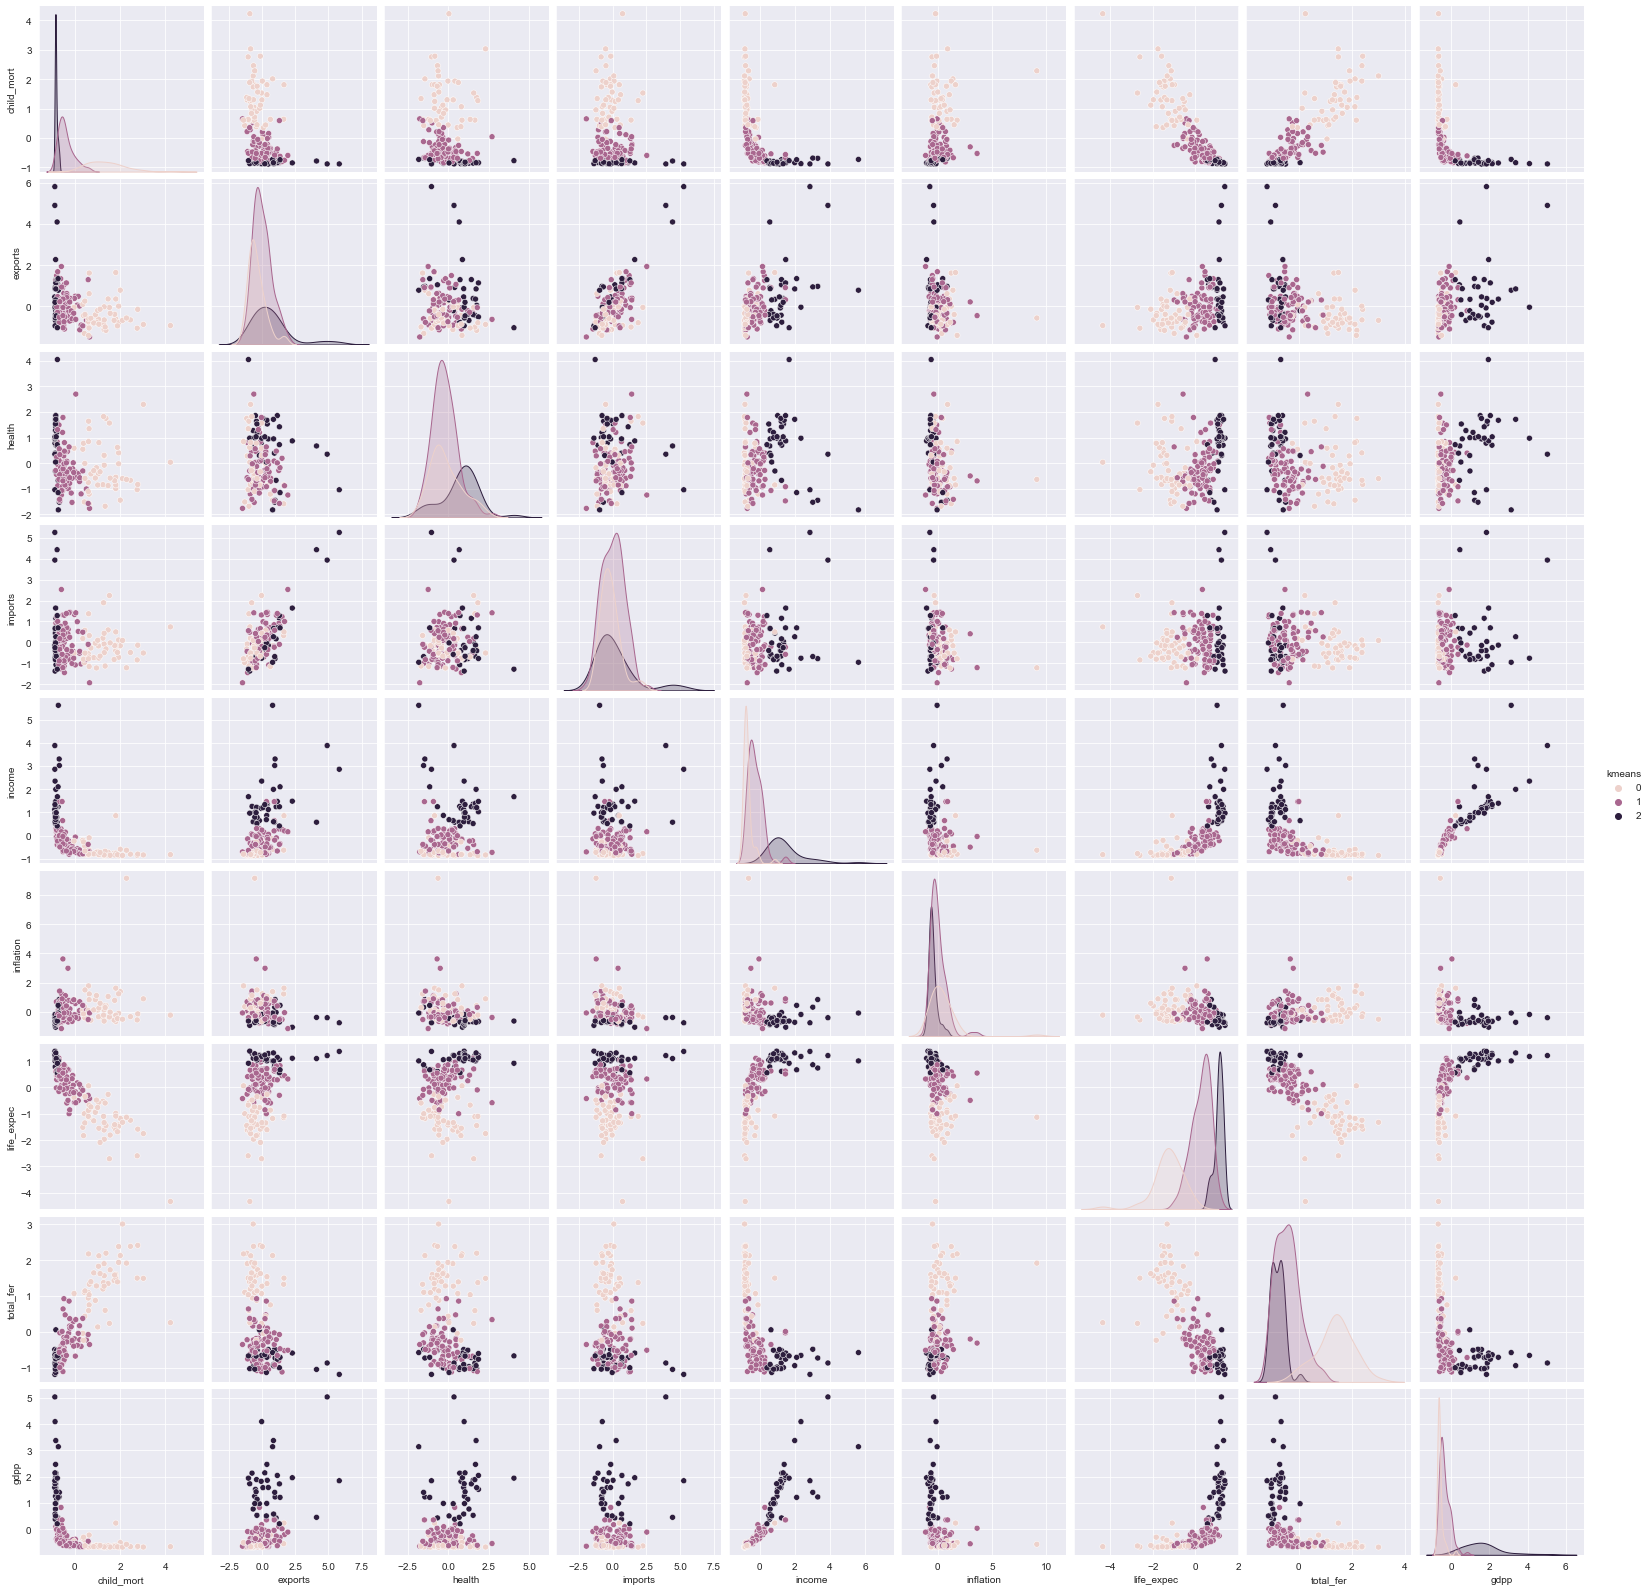

In [21]:
sns.pairplot(data_kmeans, hue='kmeans')

We can now see the countries in each cluster and how they are distributed among different variables. We will now add a label depending on the cluster they belong to and how it relates to the countries. We will also add a label for the countries that are in need of aid.

The way we will label the clusters is as follows:
* Cluster 0: Underdeveloped
* Cluster 1: Developing
* Cluster 2: Developed

We can see that countries in Cluster 0 have a high child mortality rate, low income, and low GDP per capita. These countries are in need of aid. Countries in Cluster 1 have a low child mortality rate, low income, and low GDP per capita. These countries are also in need of aid, but not in such a critical condition as countries in Cluster 0. Countries in Cluster 2 have a low child mortality rate, high income, and high GDP per capita. These countries are not in need of aid.

Additionally, we will create a map coloring the countries based on the cluster they belong to.

#### Adding country labels

In [49]:
# Adding country labels
data_kmeans['country_label'] = data_kmeans['kmeans'].map({0: 'Underdeveloped', 1: 'Developing', 2: 'Developed'})
data_kmeans['country_label'] = data_kmeans['country_label'].astype('category')

#### Creating map

In [53]:
# Creating map
fig = px.choropleth(locations=data_kmeans['country'],
                    locationmode="country names",
                    color=data_kmeans['country_label'],
                    color_discrete_map={'Underdeveloped': '#EDD1CB', 'Developing': '#AA6991', 'Developed': '#2D1E3E'},
                    )

fig.show()

## Conclusion
We can see that the countries in need of aid are mostly in Africa. The countries from South America and most of the countries in Asia belong to the **developing** cluster. The countries from North America and Europe belong to the **developed** cluster.

We can conclude that the clusters obtained from the K-Means are quite accurate. The clusters obtained are closely related to the UN's classification of countries. We can conclude that the K-Means method is the best method for this dataset and provides good results.